In [111]:


from ucimlrepo import fetch_ucirepo  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
Y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

## Pre-Processing

In [112]:
Y['class'].unique()


array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [113]:
Y = ((Y['class'] == 'vgood') | (Y['class'] == 'good')).astype(float)
Y[Y == 0] = -1

In [114]:
Y = Y.values.reshape(-1,1)

In [115]:
Y

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [ 1.],
       [ 1.]], shape=(1728, 1))

In [116]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(1728, 1)
(1728, 6)
['med' 'low' '3' 'more' 'small' 'low' -1.0]


In [117]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [118]:
X['safety'].unique()
safeties = ['low', 'med', 'high']

In [119]:
from sklearn.preprocessing import OrdinalEncoder

In [120]:
enc = OrdinalEncoder(categories = [safeties])

In [121]:
#enc.fit_transform(X[['safety']])

In [122]:
X.loc[:,'safety'] = enc.fit_transform(X[['safety']])

In [123]:
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,0.0
1,vhigh,vhigh,2,2,small,1.0
2,vhigh,vhigh,2,2,small,2.0
3,vhigh,vhigh,2,2,med,0.0
4,vhigh,vhigh,2,2,med,1.0
5,vhigh,vhigh,2,2,med,2.0
6,vhigh,vhigh,2,2,big,0.0
7,vhigh,vhigh,2,2,big,1.0
8,vhigh,vhigh,2,2,big,2.0
9,vhigh,vhigh,2,4,small,0.0


In [124]:
X['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [125]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['vhigh', 'high', 'med', 'low']])

In [126]:
X.loc[:,'buying'] = enc.fit_transform(X[['buying']])

In [127]:
X['buying'].unique()

array([0.0, 1.0, 2.0, 3.0], dtype=object)

In [128]:
X['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [129]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['vhigh', 'high', 'med', 'low']])
X.loc[:,'maint'] = enc.fit_transform(X[['maint']])

In [130]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,0.0,0.0,2,2,small,0.0
1,0.0,0.0,2,2,small,1.0
2,0.0,0.0,2,2,small,2.0
3,0.0,0.0,2,2,med,0.0
4,0.0,0.0,2,2,med,1.0


In [131]:
X['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [132]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['small', 'med', 'big']])
X.loc[:,'lug_boot'] = enc.fit_transform(X[['lug_boot']])

In [133]:
X['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [134]:
X['doors'].unique()
X.loc[:,'doors'] = X['doors'].replace({'5more': '5'}).astype(float)

In [135]:
X

,buying,maint,doors,persons,lug_boot,safety
0,0.0,0.0,2.0,2,0.0,0.0
1,0.0,0.0,2.0,2,0.0,1.0
2,0.0,0.0,2.0,2,0.0,2.0
3,0.0,0.0,2.0,2,1.0,0.0
4,0.0,0.0,2.0,2,1.0,1.0
...,...,...,...,...,...,...
1723,3.0,3.0,5.0,more,1.0,1.0
1724,3.0,3.0,5.0,more,1.0,2.0
1725,3.0,3.0,5.0,more,2.0,0.0
1726,3.0,3.0,5.0,more,2.0,1.0


In [136]:
X.loc[:,'persons'] = X['persons'].replace({'more' : '6'}).astype(float)

In [137]:
print(Y.shape)
print(X.shape)

(1728, 1)
(1728, 6)


In [138]:
np.isnan(Y).any()

np.False_

In [139]:
Y = Y.flatten()

## Implementing Decision Tree Classifier

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the decision tree classifier
estimator = DecisionTreeClassifier(criterion='entropy')

# Split 1: Train size = 20%, Test size = 80%
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_20.fit(X_train_20, Y_train_20)
best_params_20 = grid_search_20.best_params_
cv_score_20 = grid_search_20.best_score_
additional_cv_score_20 = np.mean(cross_val_score(grid_search_20.best_estimator_, X_train_20, Y_train_20, cv=3))

print("Results for 20% training data:")
print("Best parameters:", best_params_20)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_20:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_20:.4f}")
y_pred_20 = grid_search_20.best_estimator_.predict(X_test_20)
print("Classification Report:")
print(classification_report(Y_test_20, y_pred_20))

# Split 2: Train size = 50%, Test size = 50%
X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_50.fit(X_train_50, Y_train_50)
best_params_50 = grid_search_50.best_params_
cv_score_50 = grid_search_50.best_score_
additional_cv_score_50 = np.mean(cross_val_score(grid_search_50.best_estimator_, X_train_50, Y_train_50, cv=3))

print("\nResults for 50% training data:")
print("Best parameters:", best_params_50)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_50:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_50:.4f}")
y_pred_50 = grid_search_50.best_estimator_.predict(X_test_50)
print("Classification Report:")
print(classification_report(Y_test_50, y_pred_50))

# Split 3: Train size = 80%, Test size = 20%
X_train_80, X_test_80, Y_train_80, Y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_80.fit(X_train_80, Y_train_80)
best_params_80 = grid_search_80.best_params_
cv_score_80 = grid_search_80.best_score_
additional_cv_score_80 = np.mean(cross_val_score(grid_search_80.best_estimator_, X_train_80, Y_train_80, cv=3))

print("\nResults for 80% training data:")
print("Best parameters:", best_params_80)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_80:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_80:.4f}")
y_pred_80 = grid_search_80.best_estimator_.predict(X_test_80)
print("Classification Report:")
print(classification_report(Y_test_80, y_pred_80))


Results for 20% training data:
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.9362
Additional Cross-validated Accuracy: 0.9362
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.99      0.95      0.97      1284
         1.0       0.56      0.83      0.67        99

    accuracy                           0.94      1383
   macro avg       0.77      0.89      0.82      1383
weighted avg       0.96      0.94      0.95      1383


Results for 50% training data:
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.9479
Additional Cross-validated Accuracy: 0.9479
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.98       802
         1.0       0.83      0.69      0.75        62

    accuracy                           0.97       864


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assume best_params_20 is already defined from previous GridSearchCV

accuracies_20 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20n
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_20)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_20.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_20)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9190
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.97      0.96      1278
         1.0       0.44      0.25      0.32       105

    accuracy                           0.92      1383
   macro avg       0.69      0.61      0.64      1383
weighted avg       0.90      0.92      0.91      1383


Trial 2 Results:
Accuracy: 0.9617
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98      1280
         1.0       0.86      0.58      0.69       103

    accuracy                           0.96      1383
   macro avg       0.91      0.79      0.84      1383
weighted avg       0.96      0.96      0.96      1383


Trial 3 Results:
Accuracy: 0.9356
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.99      0.94      0.96      1276
         1.0       0.55      0.92      0.69       107

    accu

In [142]:


accuracies_50 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_50)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_50.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_50)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9560
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.97      0.98       794
         1.0       0.72      0.74      0.73        70

    accuracy                           0.96       864
   macro avg       0.85      0.86      0.85       864
weighted avg       0.96      0.96      0.96       864


Trial 2 Results:
Accuracy: 0.9606
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.98      0.98       803
         1.0       0.71      0.75      0.73        61

    accuracy                           0.96       864
   macro avg       0.84      0.87      0.85       864
weighted avg       0.96      0.96      0.96       864


Trial 3 Results:
Accuracy: 0.9618
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98       800
         1.0       0.84      0.59      0.70        64

    accu

In [143]:

accuracies_80 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_80)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_80.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_80)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9509
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.97      0.97       318
         1.0       0.69      0.71      0.70        28

    accuracy                           0.95       346
   macro avg       0.83      0.84      0.84       346
weighted avg       0.95      0.95      0.95       346


Trial 2 Results:
Accuracy: 0.9509
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.99      0.97       313
         1.0       0.83      0.61      0.70        33

    accuracy                           0.95       346
   macro avg       0.90      0.80      0.84       346
weighted avg       0.95      0.95      0.95       346


Trial 3 Results:
Accuracy: 0.9538
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.98      0.98       322
         1.0       0.70      0.58      0.64        24

    accu

## KNN

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy
from matplotlib.colors import ListedColormap
from functools import partial

In [145]:
print(Y.shape)
print(X.shape)

(1728,)
(1728, 6)


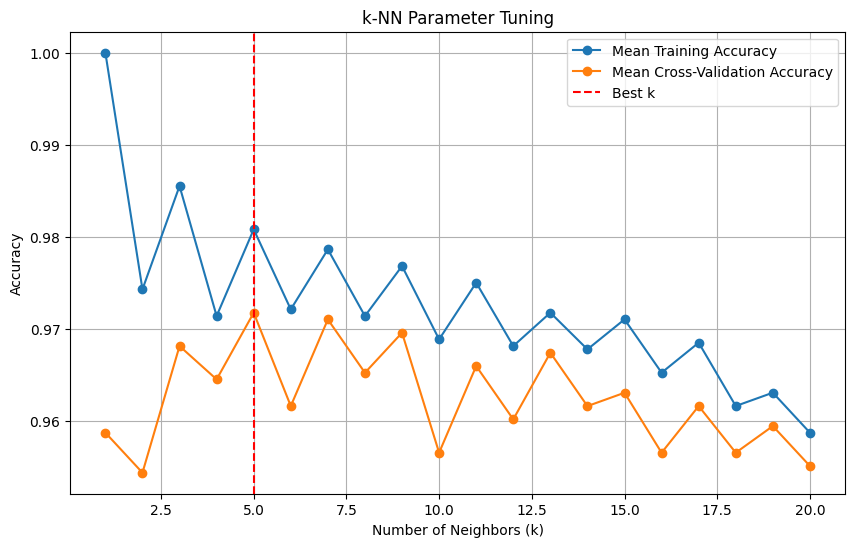

Best parameters: {'n_neighbors': np.int64(5)}
Best cross-validation score: 0.9717768556069037
Test accuracy with best parameters: 0.9682080924855492


In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming X and Y are your feature matrix and target vector
# Example data (replace with your actual data)
# X = np.array(...)  # Your feature data
# Y = np.array(...)  # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 27)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

In [147]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.2, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_1 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_1}")


Trial 1
Accuracy: 0.9660159074475777
Confusion Matrix:
[[1274    9]
 [  38   62]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98      1283
         1.0       0.87      0.62      0.73       100

    accuracy                           0.97      1383
   macro avg       0.92      0.81      0.85      1383
weighted avg       0.96      0.97      0.96      1383

Trial 2
Accuracy: 0.9718004338394793
Confusion Matrix:
[[1270   12]
 [  27   74]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.98      1282
         1.0       0.86      0.73      0.79       101

    accuracy                           0.97      1383
   macro avg       0.92      0.86      0.89      1383
weighted avg       0.97      0.97      0.97      1383

Trial 3
Accuracy: 0.96529284164859
Confusion Matrix:
[[1271    3]
 [  45   64]]
Classification Report:
              precision    recall

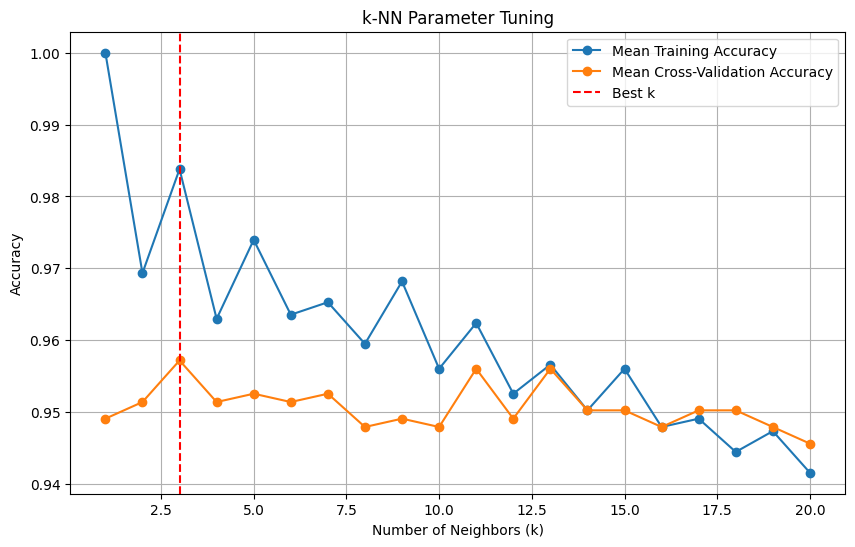

Best parameters: {'n_neighbors': np.int64(3)}
Best cross-validation score: 0.9571759259259259
Test accuracy with best parameters: 0.9768518518518519


In [148]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

In [149]:


# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.5, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_2 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_2}")


Trial 1
Accuracy: 0.9756944444444444
Confusion Matrix:
[[800   5]
 [ 16  43]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99       805
         1.0       0.90      0.73      0.80        59

    accuracy                           0.98       864
   macro avg       0.94      0.86      0.90       864
weighted avg       0.97      0.98      0.97       864

Trial 2
Accuracy: 0.9699074074074074
Confusion Matrix:
[[793   7]
 [ 19  45]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.98       800
         1.0       0.87      0.70      0.78        64

    accuracy                           0.97       864
   macro avg       0.92      0.85      0.88       864
weighted avg       0.97      0.97      0.97       864

Trial 3
Accuracy: 0.9606481481481481
Confusion Matrix:
[[791   5]
 [ 29  39]]
Classification Report:
              precision    recall  f1-score

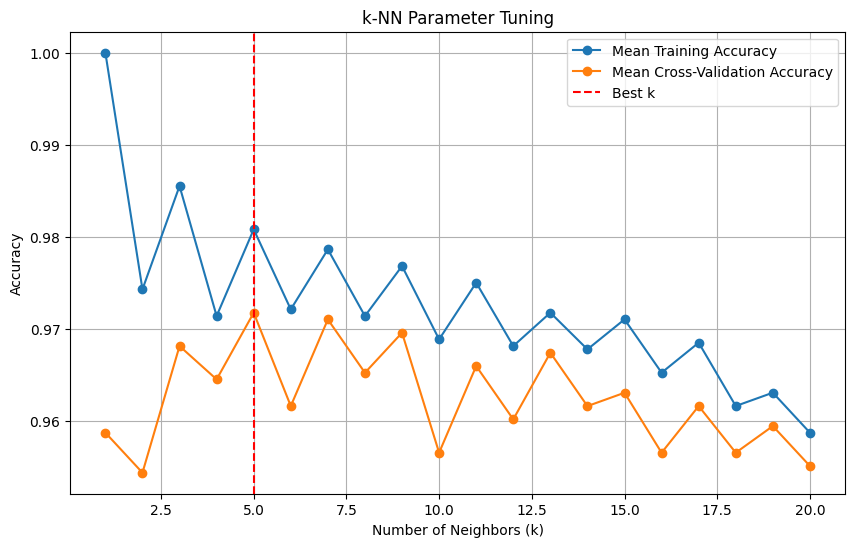

Best parameters: {'n_neighbors': np.int64(5)}
Best cross-validation score: 0.9717768556069037
Test accuracy with best parameters: 0.9682080924855492


In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

In [151]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.8, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_3 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_3}")


Trial 1
Accuracy: 0.976878612716763
Confusion Matrix:
[[320   0]
 [  8  18]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.98      1.00      0.99       320
         1.0       1.00      0.69      0.82        26

    accuracy                           0.98       346
   macro avg       0.99      0.85      0.90       346
weighted avg       0.98      0.98      0.97       346

Trial 2
Accuracy: 0.9710982658959537
Confusion Matrix:
[[321   1]
 [  9  15]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98       322
         1.0       0.94      0.62      0.75        24

    accuracy                           0.97       346
   macro avg       0.96      0.81      0.87       346
weighted avg       0.97      0.97      0.97       346

Trial 3
Accuracy: 0.9739884393063584
Confusion Matrix:
[[315   0]
 [  9  22]]
Classification Report:
              precision    recall  f1-score 

## Random forest

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, Y are defined

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'max_features': [1, 8, 20]
}

# Find best parameters for each split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_20.fit(X_train_20, y_train_20)
best_params_20 = grid_search_20.best_params_

X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_50.fit(X_train_50, y_train_50)
best_params_50 = grid_search_50.best_params_

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_80.fit(X_train_80, y_train_80)
best_params_80 = grid_search_80.best_params_

# Visualization of hyperparameter tuning
results_20 = grid_search_20.cv_results_
results_50 = grid_search_50.cv_results_
results_80 = grid_search_80.cv_results_

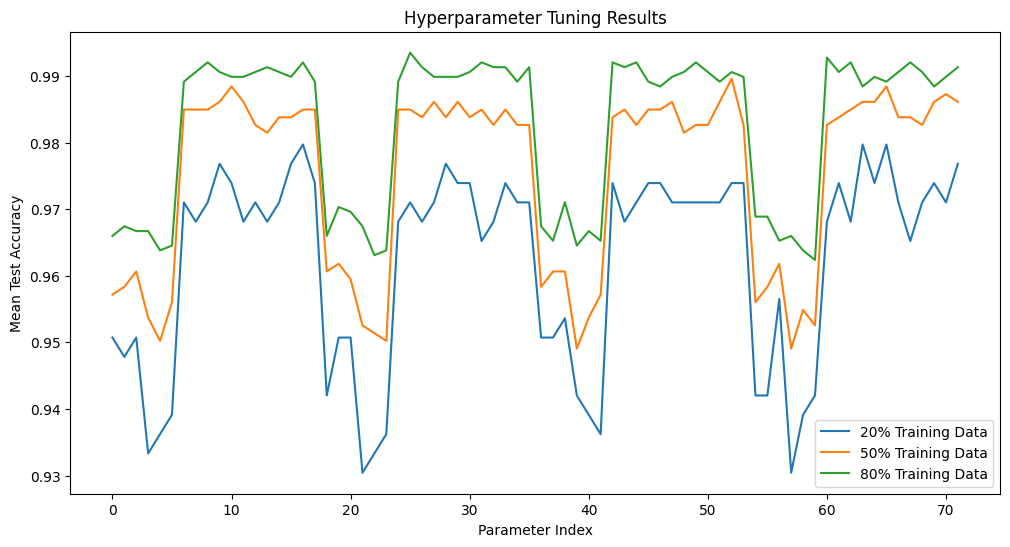

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(results_20['mean_test_score'], label='20% Training Data')
plt.plot(results_50['mean_test_score'], label='50% Training Data')
plt.plot(results_80['mean_test_score'], label='80% Training Data')
plt.xlabel('Parameter Index')
plt.ylabel('Mean Test Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.show()

In [154]:
# Code block for 20% split
print("20% Training Data")
accuracies_20 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_20)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_20.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 20% Training Data: {np.mean(accuracies_20)}\n")



20% Training Data
Trial 1 Accuracy: 0.9609544468546638
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.98      0.97      0.98      1279
         1.0       0.71      0.81      0.76       104

    accuracy                           0.96      1383
   macro avg       0.85      0.89      0.87      1383
weighted avg       0.96      0.96      0.96      1383

Trial 2 Accuracy: 0.9515545914678236
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.98      0.97      0.97      1276
         1.0       0.67      0.75      0.70       107

    accuracy                           0.95      1383
   macro avg       0.82      0.86      0.84      1383
weighted avg       0.95      0.95      0.95      1383

Trial 3 Accuracy: 0.9667389732465654
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.98      0.98      0.98      1278
   

In [155]:
# Code block for 50% split
print("50% Training Data")
accuracies_50 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_50.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 50% Training Data: {np.mean(accuracies_50)}\n")

50% Training Data
Trial 1 Accuracy: 0.9861111111111112
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       797
         1.0       0.94      0.88      0.91        67

    accuracy                           0.99       864
   macro avg       0.96      0.94      0.95       864
weighted avg       0.99      0.99      0.99       864

Trial 2 Accuracy: 0.9837962962962963
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       799
         1.0       0.92      0.86      0.89        65

    accuracy                           0.98       864
   macro avg       0.95      0.93      0.94       864
weighted avg       0.98      0.98      0.98       864

Trial 3 Accuracy: 0.9895833333333334
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       796
   

In [ ]:
# Code block for 80% split
print("80% Training Data")
accuracies_80 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_80)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_80.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}:{classification_report(y_test, y_pred)}")
print(f"Average Accuracy for 80% Training Data: {np.mean(accuracies_80)}\n")

80% Training Data
Trial 1 Accuracy: 0.9913294797687862
Classification Report for Trial 1:              precision    recall  f1-score   support

        -1.0       1.00      0.99      1.00       319
         1.0       0.90      1.00      0.95        27

    accuracy                           0.99       346
   macro avg       0.95      1.00      0.97       346
weighted avg       0.99      0.99      0.99       346

Trial 2 Accuracy: 0.9942196531791907
Classification Report for Trial 2:              precision    recall  f1-score   support

        -1.0       1.00      0.99      1.00       317
         1.0       0.94      1.00      0.97        29

    accuracy                           0.99       346
   macro avg       0.97      1.00      0.98       346
weighted avg       0.99      0.99      0.99       346

Trial 3 Accuracy: 1.0
Classification Report for Trial 3:              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       313
         1.0       1.

In [157]:

""" from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'max_depth': [1, 2, 3, 4, 5]}
estimator = tree.DecisionTreeClassifier(criterion='entropy')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, Y)

# Get best hyperparameters
best_params = grid_search.best_params_ """

' from sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import classification_report\n\nparam_grid = {\'max_depth\': [1, 2, 3, 4, 5]}\nestimator = tree.DecisionTreeClassifier(criterion=\'entropy\')\n\n# Perform GridSearchCV\ngrid_search = GridSearchCV(estimator, param_grid, cv=10, scoring="accuracy")\ngrid_search.fit(X, Y)\n\n# Get best hyperparameters\nbest_params = grid_search.best_params_ '

In [158]:
""" 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd 
#import seaborn as sns

partitions = [0.2, 0.5, 0.8]

# new list code 
train_accuracies = []
test_accuracies = []


for partition in partitions:

    # new code to remember errors
    partition_train_acc = []
    partition_test_acc = []

    for trial in range(3):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=partition)

        best_model = DecisionTreeClassifier(criterion='entropy', **best_params, random_state=None)
        # random state = None ensures a random data split within the partitions 

        # Fit the model
        best_model.fit(X_train, Y_train)
        
        # Calculate accuracies
        train_acc = best_model.score(X_train, Y_train)
        test_acc = best_model.score(X_test, Y_test)

        # new code to remember the errors 
        partition_train_acc.append(train_acc)
        partition_test_acc.append(test_acc)

        y_pred = best_model.predict(X_test)

        # Print classification report for predictions
        print(classification_report(Y_test, y_pred))
        
        # Print results for this trial directly
        print(f"Partition: {partition*100:.0f}/100, Trial: {trial+1}")
        print(f"Train Accuracy: {train_acc:.4f}")
        # print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")

    # new code to remember errors
    avg_train_acc = np.mean(partition_train_acc)
    avg_test_acc = np.mean(partition_test_acc)

    # Store average accuracies for this partition
    train_accuracies.append(avg_train_acc)
    test_accuracies.append(avg_test_acc)


results_df = pd.DataFrame({
    'Partition': [f"{partition*100:.0f}/100" for partition in partitions],
    'Average Train Accuracy': train_accuracies,
    'Average Test Accuracy': test_accuracies,
})

print("\nAverage Accuracies:")
print(results_df)
    
# verify if i need to d ogrid search before 
# find best hyperparameter and then run the trials 
# cross validation is used to find best parameters
     """

' \n\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import classification_report\nimport pandas as pd \n#import seaborn as sns\n\npartitions = [0.2, 0.5, 0.8]\n\n# new list code \ntrain_accuracies = []\ntest_accuracies = []\n\n\nfor partition in partitions:\n\n    # new code to remember errors\n    partition_train_acc = []\n    partition_test_acc = []\n\n    for trial in range(3):\n        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=partition)\n\n        best_model = DecisionTreeClassifier(criterion=\'entropy\', **best_params, random_state=None)\n        # random state = None ensures a random data split within the partitions \n\n        # Fit the model\n        best_model.fit(X_train, Y_train)\n        \n        # Calculate accuracies\n        train_acc = best_model.score(X_train, Y_train)\n        test_acc = best_model.score(X_test, Y_test)\n\n        # new code to remember the errors \n        partition_train_acc.app

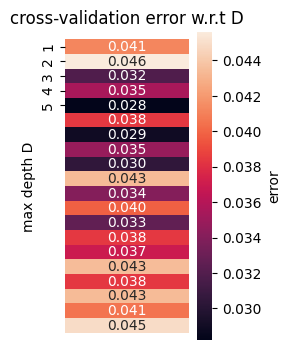

In [159]:
import seaborn as sns

D_list = [1, 2, 3, 4, 5]

def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()


cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

## 